<a href="https://colab.research.google.com/github/khushidubeyokok/BERTopic/blob/main/1_Monthly_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Topic Analysis Based on Monthly Publication Frequency

This notebook demonstrates the practical application of topic modeling by analyzing the publication frequency of research papers for specific topics on a monthly basis.

Using the [titles_topics_probabilities.csv](https://raw.githubusercontent.com/khushidubeyokok/BERTopic/refs/heads/main/titles_topics_probabilities.csv) file created in our previous [topic modeling notebook](https://github.com/khushidubeyokok/BERTopic/blob/main/BERTopic.ipynb), we’ll explore how often papers are published under a particular topic each month.



## 📁 Importing Required Libraries and Data
First, we’ll load our CSV file [titles_topics_probabilities.csv](https://raw.githubusercontent.com/khushidubeyokok/BERTopic/refs/heads/main/titles_topics_probabilities.csv) containing the paper titles, topics and probablities  directly from the GitHub repository, and the **[neuralwork/arxiver](https://huggingface.co/datasets/neuralwork/arxiver)** dataset from Hugging Face.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
!pip -q install datasets


# Load the CSV file directly from GitHub
url = "https://raw.githubusercontent.com/khushidubeyokok/BERTopic/refs/heads/main/titles_topics_probabilities.csv"
df = pd.read_csv(url)

# Display a sample of the data to confirm it loaded correctly
print("Sample data:")
df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Sample data:


,Title,Topic,Probability
0,Image Completion via Dual-path Cooperative Fil...,-1,0.000000
1,High Sensitivity Beamformed Observations of th...,0,1.000000
2,"Maybe, Maybe Not: A Survey on Uncertainty in V...",-1,0.000000
3,Enhancing GAN-Based Vocoders with Contrastive ...,4,0.758336
4,Nonvolatile Magneto-Thermal Switching in MgB2,39,0.781350


In [2]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("neuralwork/arxiver")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.14k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/1.44G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/63357 [00:00<?, ? examples/s]

In [3]:
# Display the dataset structure
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'abstract', 'authors', 'published_date', 'link', 'markdown'],
        num_rows: 63357
    })
})


In [4]:
# Extract publication dates and add to the topics DataFrame
published_dates = [entry['published_date'] for entry in dataset["train"]]
df['Published_Date'] = pd.to_datetime(published_dates, errors='coerce')

# Display a sample of the data to verify
print("Sample data with publication dates added:")
df.head()

Sample data with publication dates added:


,Title,Topic,Probability,Published_Date
0,Image Completion via Dual-path Cooperative Fil...,-1,0.000000,2023-04-30 03:54:53+00:00
1,High Sensitivity Beamformed Observations of th...,0,1.000000,2023-07-31 01:36:55+00:00
2,"Maybe, Maybe Not: A Survey on Uncertainty in V...",-1,0.000000,2022-12-14 00:07:06+00:00
3,Enhancing GAN-Based Vocoders with Contrastive ...,4,0.758336,2023-09-16 20:04:16+00:00
4,Nonvolatile Magneto-Thermal Switching in MgB2,39,0.781350,2023-07-31 04:59:19+00:00


## 📅 Formatting Data for Monthly Analysis

Now, we’ll extract the year and month for each publication date to make it easier to analyze the data on a monthly basis.


In [5]:
# Extract year and month for grouping
df['Year_Month'] = df['Published_Date'].dt.to_period('M')

# Display the updated DataFrame
df.head()

<ipython-input-5-2d52b6e32342>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year_Month'] = df['Published_Date'].dt.to_period('M')


,Title,Topic,Probability,Published_Date,Year_Month
0,Image Completion via Dual-path Cooperative Fil...,-1,0.000000,2023-04-30 03:54:53+00:00,2023-04
1,High Sensitivity Beamformed Observations of th...,0,1.000000,2023-07-31 01:36:55+00:00,2023-07
2,"Maybe, Maybe Not: A Survey on Uncertainty in V...",-1,0.000000,2022-12-14 00:07:06+00:00,2022-12
3,Enhancing GAN-Based Vocoders with Contrastive ...,4,0.758336,2023-09-16 20:04:16+00:00,2023-09
4,Nonvolatile Magneto-Thermal Switching in MgB2,39,0.781350,2023-07-31 04:59:19+00:00,2023-07


## 📈 Analyzing Monthly Publication Frequency by Topic

Define a function that takes a topic as input and visualizes the number of papers published each month for that topic.


In [48]:
def analyze_publication_frequency(topic_number):
    """
    Analyze and visualize the monthly publication frequency of papers for a given topic number.

    Parameters:
    topic_number (int): The topic number from the BERTopic model.

    Returns:
    None
    """
    # Filter DataFrame for the selected topic
    topic_df = df[df['Topic'] == topic_number]

    if topic_df.empty:
        print(f"No data found for Topic {topic_number}. Please try a different topic number.")
        return

    print("\nFirst 10 paper details:")
    print(topic_df.head(10).to_markdown(index=False))

    # Group by 'Year_Month' and count the number of papers published each month
    monthly_counts = topic_df.groupby('Year_Month').size()

    # Display total number of papers under the topic
    total_papers = len(topic_df)
    print(f" \n Total papers under Topic {topic_number}: {total_papers} ")
    # Display total papers per month
    print("Total papers per month:")
    print(monthly_counts.to_string())

    # Plot the results
    plt.figure(figsize=(10, 5))
    monthly_counts.plot(kind='line', marker='o')
    plt.title(f'Monthly Publication Frequency for Topic {topic_number}')
    plt.xlabel('Month')
    plt.ylabel('Number of Papers')
    plt.grid()
    plt.show()


First 10 paper details:
| Title                                                                    |   Topic |   Probability | Published_Date            | Year_Month   |
|:-------------------------------------------------------------------------|--------:|--------------:|:--------------------------|:-------------|
| Agree To Disagree                                                        |      98 |             1 | 2023-09-24 18:06:45+00:00 | 2023-09      |
| NESTLE: a No-Code Tool for Statistical Analysis of Legal Corpus          |      98 |             1 | 2023-09-08 06:23:25+00:00 | 2023-09      |
| The Cambridge Law Corpus: A Dataset for Legal AI Research                |      98 |             1 | 2023-09-21 17:24:40+00:00 | 2023-09      |
| Question-Answering Approach to Evaluating Legal Summaries                |      98 |             1 | 2023-09-26 15:36:29+00:00 | 2023-09      |
| Resolving Legalese: A Multilingual Exploration of Negation Scope         |      98 |             

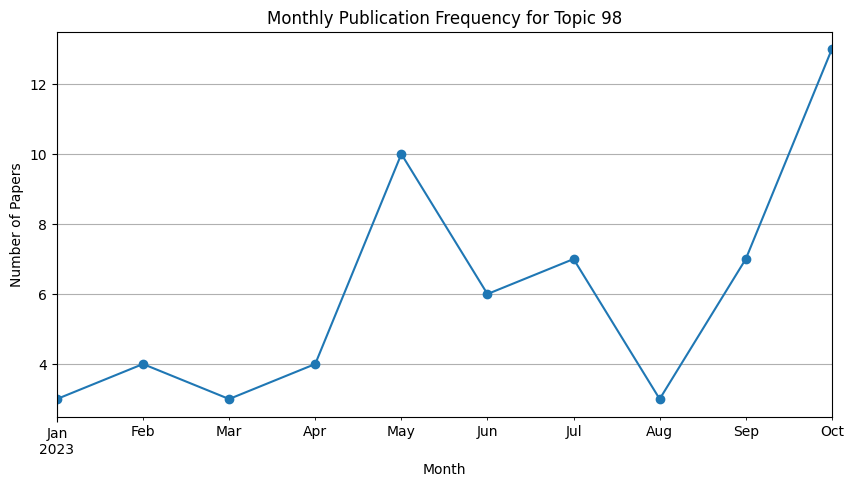

In [92]:
# Example usage
analyze_publication_frequency(98)  # Input a topic number

## Here topic number 98 corresponds to papers related to Legal AI and research , the ouput displays first 10 papers under this topic
## along with total paper count, paper count per month and a timeline to visualise this

### 🛠 Usage Instructions

1. To analyze a specific topic, call the `analyze_publication_frequency()` function with a topic number.
   - Example: `analyze_publication_frequency(0)`
2. The function will display a line plot showing the monthly publication frequency of papers for the chosen topic.

This analysis allows users to explore research trends, identifying months with higher research activity for each topic.
